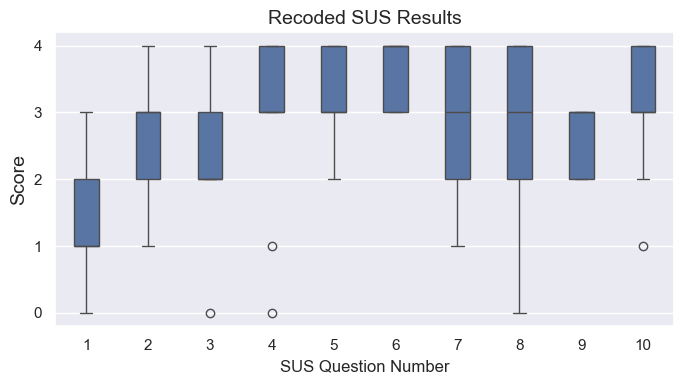

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os

# Defining JSON File path
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_name = "survey.csv"
file_path = r"C:\Users\chris\OneDrive\Desktop\survey.csv"  # Using raw string

# Load the CSV file
df = pd.read_csv(file_path)

# Filter columns that start with 'G03'
g03_columns = [col for col in df.columns if col.startswith('G03')]

# Create a DataFrame for G03 questions
df_g03 = df[g03_columns]

# Melt the DataFrame to long-form for seaborn
df_melted = df_g03.melt(var_name='Question', value_name='Response')
df_melted['Response'] = df_melted.apply(lambda row: row['Response'] - 1 if int(row['Question'][-1]) % 2 != 0 else 5 - row['Response'], axis=1)


# Set the figure size
sns.set(rc={"figure.figsize": (7, 4)})

# Create the boxplot
sns.boxplot(x='Question', y='Response', data=df_melted, width=0.4)

# Customize the plot
#plt.title('SUS Questions', fontsize=14)

# Set the x-tick labels
labels = [i for i in range(1,11)]
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.xlabel('SUS Question Number', fontsize=12)
plt.ylabel('Score', fontsize=14)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title("Recoded SUS Results", fontsize=14)

plt.tight_layout()
plt.savefig("Survey-SUS_results_Boxplots", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
g03_means = df_g03.mean()

# Create a DataFrame for these averages
df_g03_means = pd.DataFrame(g03_means, columns=['Average'])

# Display the averages
print(df_g03_means)


         Average
G03Q01  2.444444
G03Q02  2.222222
G03Q03  3.333333
G03Q04  2.222222
G03Q05  4.222222
G03Q06  1.444444
G03Q07  3.888889
G03Q08  2.333333
G03Q09  3.666667
G03Q10  1.888889


In [15]:
2.5 * ((df_g03_means.loc["G03Q01"] - 1) + (df_g03_means.loc["G03Q03"] - 1) + (df_g03_means.loc["G03Q05"] - 1) + (df_g03_means.loc["G03Q07"] - 1) + (df_g03_means.loc["G03Q09"] - 1) + (5 - df_g03_means.loc["G03Q02"]) + (5 - df_g03_means.loc["G03Q04"]) + (5 - df_g03_means.loc["G03Q06"]) + (5 - df_g03_means.loc["G03Q08"]) + (5 - df_g03_means.loc["G03Q10"]))

Average    68.611111
dtype: float64

In [17]:
g02_columns = [col for col in df.columns if col.startswith('G02')]

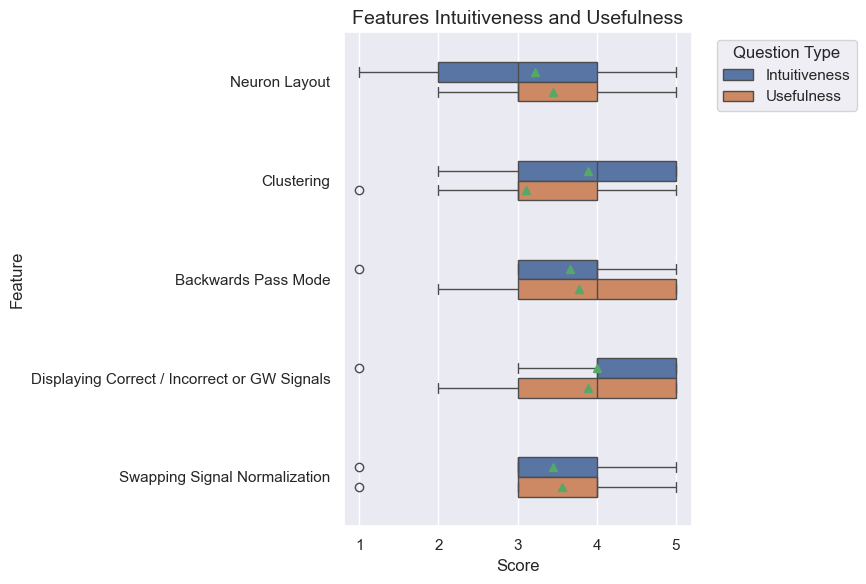

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Defining JSON File path
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
file_name = "survey.csv"
file_path = r"C:\Users\chris\OneDrive\Desktop\survey.csv"  # Using raw string

# Load the CSV file
df = pd.read_csv(file_path)

# Manually select the 5 pairs of G02 questions
g02_pairs = [
    ('G02Q00', 'G02Q01'),
    ('G02Q03', 'G02Q02'),
    ('G02Q05', 'G02Q04'),
    ('G02Q07', 'G02Q06'),
    ('G02Q09', 'G02Q08')
]

# Create a DataFrame for selected G02 questions
g02_columns = [q for pair in g02_pairs for q in pair]
df_g02 = df[g02_columns]

# Melt the DataFrame to long-form for seaborn
df_melted = df_g02.melt(var_name='Question', value_name='Response')

# Add a new column to indicate whether the question is about intuitiveness or usefulness
df_melted['Type'] = df_melted['Question'].apply(lambda x: 'Intuitiveness' if x in [pair[0] for pair in g02_pairs] else 'Usefulness')

# Group questions into pairs
df_melted['Feature'] = df_melted['Question'].apply(lambda x: f'Feature {((g02_columns.index(x)) // 2) + 1}')

# Set the figure size
sns.set(rc={"figure.figsize": (9, 6)})

# Create the boxplot with hue for different colors
sns.boxplot(y='Feature', x='Response', hue='Type', data=df_melted, showmeans = True, width = 0.4)

# Customize the plot
plt.title('Features Intuitiveness and Usefulness', fontsize=14)
plt.ylabel('Feature', fontsize=12)
plt.xlabel('Score', fontsize=12)

#plt.legend(title='Question Type', loc='lower left')


# Set the y-tick positions and labels manually
labels = ["Neuron Layout", "Clustering", "Backwards Pass Mode", "Displaying Correct / Incorrect or GW Signals", "Swapping Signal Normalization"]
plt.yticks(ticks=range(0, 5), labels=labels)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.legend(title='Question Type', loc='best', bbox_to_anchor=(1.05, 1))


plt.tight_layout()
plt.savefig("Survey-Feature_Intuitiveness_and_Usefulness", dpi=300, bbox_inches='tight')
plt.show()


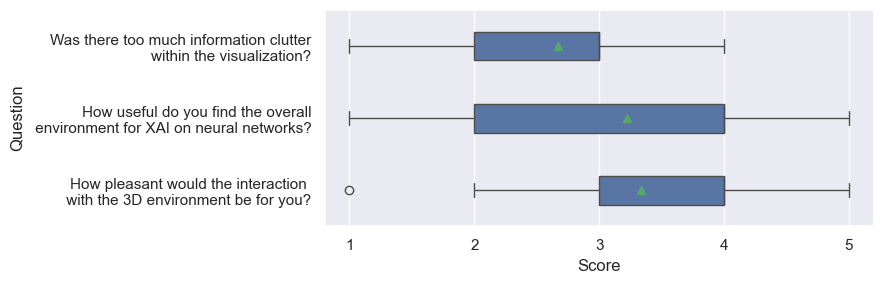

In [18]:
# Select the specific G02 questions
g02_questions = ['G02Q10', 'G02Q11', 'G02Q12']

# Create a DataFrame for selected G02 questions
df_g02 = df[g02_questions]

# Melt the DataFrame to long-form for seaborn
df_melted = df_g02.melt(var_name='Question', value_name='Response')

# Set the figure size
sns.set(rc={"figure.figsize": (9, 3)})

# Create the boxplot
sns.boxplot(x='Response', y='Question', data=df_melted, showmeans=True, width=0.4)

# Customize the plot
plt.xlabel('Score', fontsize=12)
plt.ylabel('Question', fontsize=12)

# Set the y-tick labels
question_labels = ["Was there too much information clutter\nwithin the visualization?", "How useful do you find the overall\n environment for XAI on neural networks?", "How pleasant would the interaction \n with the 3D environment be for you?"]
plt.yticks(ticks=range(len(question_labels)), labels=question_labels)


# Set x-axis to show only integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.savefig("Survey-Category2_OtherQuestions", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()